In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('D:\instacart\data_files\orders_products.csv')
df

<>:1: DeprecationWarning: invalid escape sequence '\i'
<>:1: DeprecationWarning: invalid escape sequence '\i'
C:\Users\hp\AppData\Local\Temp\ipykernel_19528\1610012599.py:1: DeprecationWarning: invalid escape sequence '\i'
  df = pd.read_csv('D:\instacart\data_files\orders_products.csv')


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_time,product_name,aisle,department,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,Morning,Soda,soft drinks,beverages,1,0
1,2539329,1,prior,1,2,8,NaN,Morning,Original Beef Jerky,popcorn jerky,snacks,3,0
2,2539329,1,prior,1,2,8,NaN,Morning,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,2,0
3,2539329,1,prior,1,2,8,NaN,Morning,Aged White Cheddar Popcorn,popcorn jerky,snacks,4,0
4,2539329,1,prior,1,2,8,NaN,Morning,XL Pick-A-Size Paper Towel Rolls,paper goods,household,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,Afternoon,Roasted & Salted Shelled Pistachios,nuts seeds dried fruit,snacks,9,0
32434485,2977660,206209,prior,13,1,12,7.0,Afternoon,Banana,fresh fruits,produce,1,1
32434486,2977660,206209,prior,13,1,12,7.0,Afternoon,High Protein Bar Chunky Peanut Butter,energy granola bars,snacks,7,0
32434487,2977660,206209,prior,13,1,12,7.0,Afternoon,Brownie Crunch High Protein Bar,energy granola bars,snacks,6,0


In [3]:
# df_sample = df.sample(1000000)
# df_sample.to_csv('D:\instacart\data_files\orders_products_sample1.csv', index=False)

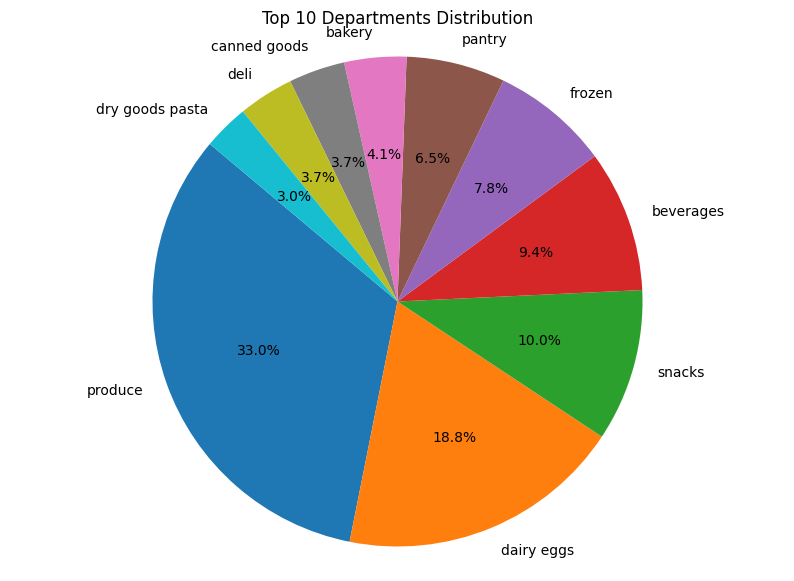

In [3]:
# Assuming 'df' is your DataFrame and 'department' is the column of interest
department_counts = df['department'].value_counts().head(10)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Departments Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Of the total food, user's order:

approx. 50% is from produce and dairy eggs

approx. 35% is from snacks, beverages, frozen and pantry departments

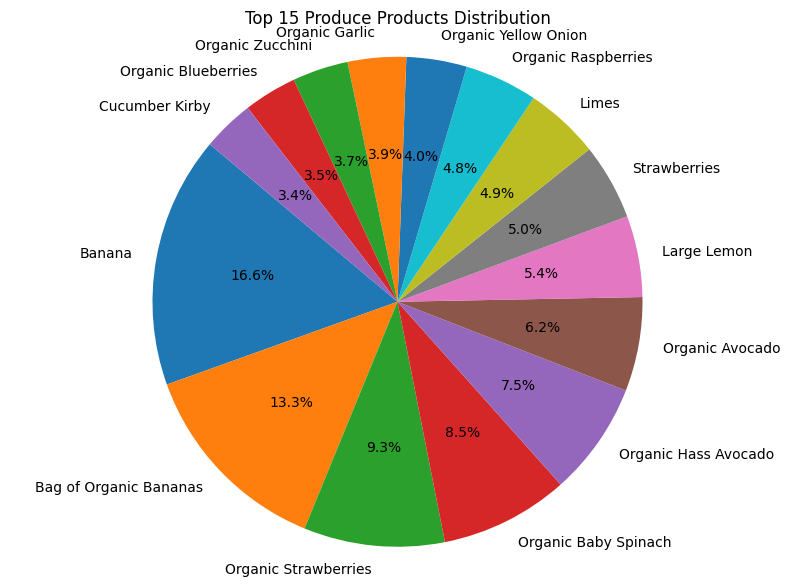

In [4]:
# Assuming 'df' is your DataFrame and 'department' and 'product_name' are the columns of interest
produce_counts = df[df['department'] == 'produce']['product_name'].value_counts().head(15)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(produce_counts, labels=produce_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Produce Products Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

from the graph it is clear that customers are more inclined towards Organic fruits and vegetables with approx. 65% of the revenue generated in the produce sector is from organic.

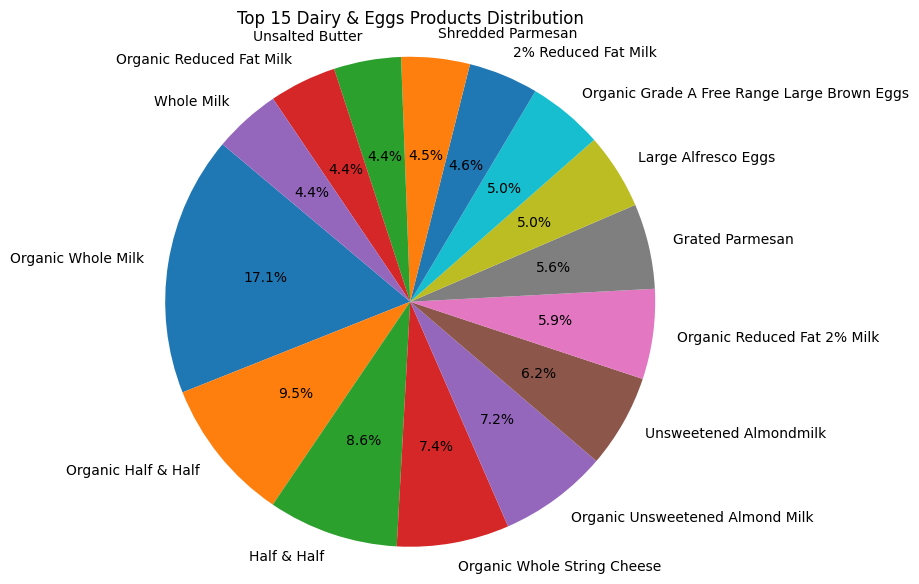

In [5]:
dairy_eggs_counts = df[df['department'] == 'dairy eggs']['product_name'].value_counts().head(15)

# Create a pie chart
plt.figure(figsize=(10, 7))
plt.pie(dairy_eggs_counts, labels=dairy_eggs_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 15 Dairy & Eggs Products Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Same result - customers are more inclined towards organic food

Top organic foods ordered by the user

<Axes: ylabel='count'>

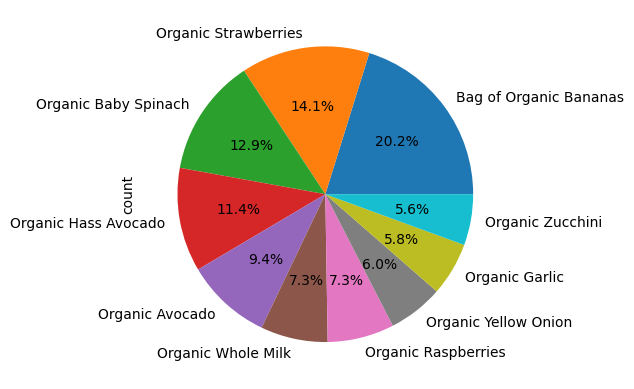

In [7]:
df[df['product_name'].str.contains('organic', case=False, na=False)]['product_name'].value_counts().head(10).plot.pie(autopct='%1.1f%%')


Top 10 Organic products bought by the users are:
Bananas, Strawberries, Spinach, Avocado, Whole Milk, Raspberries, Onion, Garlic, Zucchini

In [8]:
df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_time,product_name,aisle,department,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,Morning,Soda,soft drinks,beverages,1,0
1,2539329,1,prior,1,2,8,NaN,Morning,Original Beef Jerky,popcorn jerky,snacks,3,0
2,2539329,1,prior,1,2,8,NaN,Morning,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,2,0
3,2539329,1,prior,1,2,8,NaN,Morning,Aged White Cheddar Popcorn,popcorn jerky,snacks,4,0
4,2539329,1,prior,1,2,8,NaN,Morning,XL Pick-A-Size Paper Towel Rolls,paper goods,household,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,Afternoon,Roasted & Salted Shelled Pistachios,nuts seeds dried fruit,snacks,9,0
32434485,2977660,206209,prior,13,1,12,7.0,Afternoon,Banana,fresh fruits,produce,1,1
32434486,2977660,206209,prior,13,1,12,7.0,Afternoon,High Protein Bar Chunky Peanut Butter,energy granola bars,snacks,7,0
32434487,2977660,206209,prior,13,1,12,7.0,Afternoon,Brownie Crunch High Protein Bar,energy granola bars,snacks,6,0


Top items reordered

<Axes: xlabel='product_name'>

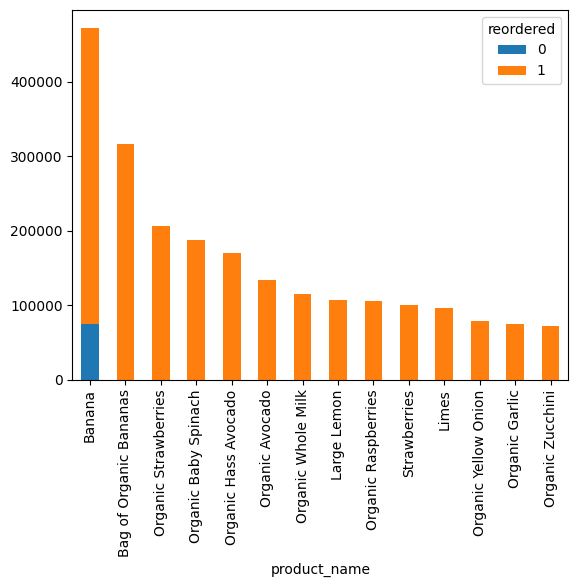

In [9]:
df.groupby('product_name')['reordered'].value_counts().sort_values(ascending=False).head(15).unstack().plot.bar(stacked=True)


In [10]:
df

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_time,product_name,aisle,department,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,NaN,Morning,Soda,soft drinks,beverages,1,0
1,2539329,1,prior,1,2,8,NaN,Morning,Original Beef Jerky,popcorn jerky,snacks,3,0
2,2539329,1,prior,1,2,8,NaN,Morning,Organic Unsweetened Vanilla Almond Milk,soy lactosefree,dairy eggs,2,0
3,2539329,1,prior,1,2,8,NaN,Morning,Aged White Cheddar Popcorn,popcorn jerky,snacks,4,0
4,2539329,1,prior,1,2,8,NaN,Morning,XL Pick-A-Size Paper Towel Rolls,paper goods,household,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,2977660,206209,prior,13,1,12,7.0,Afternoon,Roasted & Salted Shelled Pistachios,nuts seeds dried fruit,snacks,9,0
32434485,2977660,206209,prior,13,1,12,7.0,Afternoon,Banana,fresh fruits,produce,1,1
32434486,2977660,206209,prior,13,1,12,7.0,Afternoon,High Protein Bar Chunky Peanut Butter,energy granola bars,snacks,7,0
32434487,2977660,206209,prior,13,1,12,7.0,Afternoon,Brownie Crunch High Protein Bar,energy granola bars,snacks,6,0


In [11]:
aisle_name = df['aisle'].to_list()

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)

# Convert categorical columns to numeric (if applicable)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize the data (optional but helpful for distance-based algorithms like K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


C:\Users\hp\AppData\Local\Temp\ipykernel_15696\3266105559.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [7]:
aisleint = df['aisle'].to_list()

In [18]:
dic = {aisleint:aisle_name for aisleint,aisle_name in zip(aisleint,aisle_name)}

In [39]:
dic[1]

'asian foods'

In [37]:
(set(dic.values()))

{'air fresheners candles',
 'asian foods',
 'baby accessories',
 'baby bath body care',
 'baby food formula',
 'bakery desserts',
 'baking ingredients',
 'baking supplies decor',
 'beauty',
 'beers coolers',
 'body lotions soap',
 'bread',
 'breakfast bakery',
 'breakfast bars pastries',
 'bulk dried fruits vegetables',
 'bulk grains rice dried goods',
 'buns rolls',
 'butter',
 'candy chocolate',
 'canned fruit applesauce',
 'canned jarred vegetables',
 'canned meals beans',
 'canned meat seafood',
 'cat food care',
 'cereal',
 'chips pretzels',
 'cleaning products',
 'cocoa drink mixes',
 'coffee',
 'cold flu allergy',
 'condiments',
 'cookies cakes',
 'crackers',
 'cream',
 'deodorants',
 'diapers wipes',
 'digestion',
 'dish detergents',
 'dog food care',
 'doughs gelatins bake mixes',
 'dry pasta',
 'eggs',
 'energy granola bars',
 'energy sports drinks',
 'eye ear care',
 'facial care',
 'feminine care',
 'first aid',
 'food storage',
 'fresh dips tapenades',
 'fresh fruits',
 'f

In [13]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [13]:
df.to_csv('D:\instacart\data_files\clustering_data.csv', index=False)

<>:1: DeprecationWarning: invalid escape sequence '\i'
<>:1: DeprecationWarning: invalid escape sequence '\i'
C:\Users\hp\AppData\Local\Temp\ipykernel_3336\2926971746.py:1: DeprecationWarning: invalid escape sequence '\i'
  df.to_csv('D:\instacart\data_files\clustering_data.csv', index=False)
